In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from PIL import Image
import sklearn.cluster as cluster
from skimage import io

try:
    os.chdir("/Users/ryan/Dropbox/1_proj/logos/")
except:
    os.chdir("/media/ryan/hdd/Dropbox/1_proj/logos/")

In [101]:
hulls = pd.read_csv("data/hulls_erosion-char_higher_fixed.csv")
hulls

,0,1,2,3,4,5,6,7,8,9,...,616,617,618,619,620,621,622,623,624,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21st-century-fox
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3m
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abbott-labs
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abbvie-inc
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abc
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abm
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,accenture
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ace
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,actavis
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,activision-blizzard


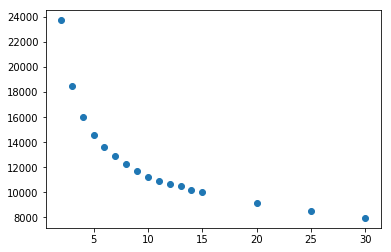

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

n_centers = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30]
inertia = []
for i in n_centers:
    inertia = np.append(inertia,cluster.KMeans(n_clusters=i).fit(hulls.loc[:,'0':'624']).inertia_)

plt.scatter(n_centers, inertia)

## Cluster hulls:

In [11]:
hull_clusters = cluster.KMeans(n_clusters=7)
hull_fit = hull_clusters.fit_predict(hulls.loc[:,'0':'624'])

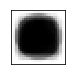

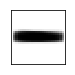

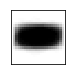

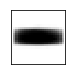

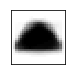

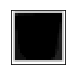

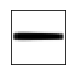

In [12]:
from IPython import display
import time

centers = hull_clusters.cluster_centers_

for i in range(centers.shape[0]):
    fig = plt.figure(figsize=(1,1))
    plt.imshow(centers[i,:].reshape(25,25), cmap="gray_r")
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

In [13]:
np.bincount(hull_fit)

array([ 67, 201,  94, 156,  50,  15, 115])

Actually, maybe we can weight the outside more than the inside? All logos will have the inside part.

## Weighted hulls

The problem with the above is that ALL hulls, almost by the definition of how we are defining the hull/rescaled image, have filled pixels in the middle. The interesting region of variation is on the periphery!

So, can we downweight the inside, upweight the outside, and then do the clustering?

In [50]:
weight_mat = np.array([[np.max(np.abs([i-13,j-13])/12) for i in range(1,26)] for j in range(1,26)])
weight_mat

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.91666667, 0.91666667, 0.91666667, 0.91666667,
        0.91666667, 0.91666667, 0.91666667, 0.91666667, 0.91666667,
        0.91666667, 0.91666667, 0.91666667, 0.91666667, 0.91666667,
        0.91666667, 0.91666667, 0.91666667, 0.91666667, 0.91666667,
        0.91666667, 0.91666667, 0.91666667, 0.91666667, 1.        ],
       [1.        , 0.91666667, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.

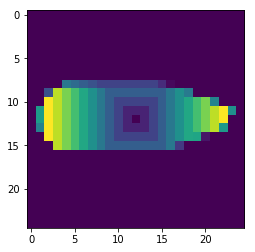

In [65]:
weighted_hulls = weight_mat.flatten()*hulls.loc[:,'0':'624'].as_matrix()
plt.imshow(weighted_hulls[0,:].reshape((25,25)))

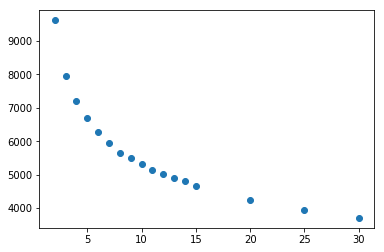

In [66]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

n_centers = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30]
inertia = []
for i in n_centers:
    inertia = np.append(inertia,cluster.KMeans(n_clusters=i).fit(weighted_hulls).inertia_)

plt.scatter(n_centers, inertia)

In [91]:
weighted_clusters = cluster.KMeans(n_clusters=6)
weighted_fit = weighted_clusters.fit_predict(weighted_hulls)

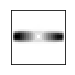

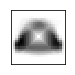

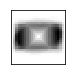

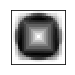

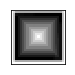

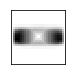

In [92]:
centers = weighted_clusters.cluster_centers_

for i in range(centers.shape[0]):
    fig = plt.figure(figsize=(1,1))
    plt.imshow(centers[i,:].reshape(25,25), cmap="gray_r")
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

In [93]:
np.bincount(weighted_fit)

array([318,  61,  67,  55,  15, 202])

In [94]:
refilled_centers = np.array([np.mean(hulls.loc[weighted_fit==j,'0':'624'], axis=0) for j in range(np.max(weighted_fit)+1)])

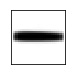

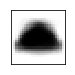

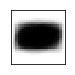

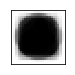

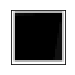

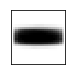

In [95]:
for i in range(refilled_centers.shape[0]):
    fig = plt.figure(figsize=(1,1))
    plt.imshow(refilled_centers[i,:].reshape(25,25), cmap="gray_r")
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

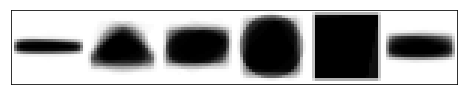

In [100]:
plt.figure(figsize=(8,2))
plt.imshow(np.hstack([refilled_centers[i,:].reshape(25,25) for i in range(6)]), cmap="gray_r")
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

In [105]:
hulls['label'] = weighted_fit
hulls.loc[:,['id','feat','label']].to_csv("data/hulls_erosion-char_higher_fixed_labeled.csv")
np.savetxt("data/new_sources/6_weighted_hull_centers.csv", hull_clusters.cluster_centers_, delimiter=',') 

/Users/ryan/anaconda3/envs/newcluster/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/Users/ryan/anaconda3/envs/newcluster/lib/python3.5/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
